<a href="https://colab.research.google.com/github/plaban1981/NLP_Question_Answer_Model/blob/main/Split_a_senetence_using_constituency_parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. split a sentence at ending Noun Phrase or Verb Phrase.

* install allenlp and spacy libraries
* allen nlp --> for constituency parsing
* spacy --> Natural Language Processing

In [ ]:
!pip install allennlp==0.9.0
!pip install overrides==4.1.2

     |████████████████████████████████| 7.6 MB 3.7 MB/s 
     |████████████████████████████████| 124 kB 64.9 MB/s 
     |████████████████████████████████| 158 kB 66.3 MB/s 
     |████████████████████████████████| 30.8 MB 107 kB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 123 kB 59.9 MB/s 
     |████████████████████████████████| 131 kB 59.8 MB/s 
     |████████████████████████████████| 5.8 MB 44.8 MB/s 
     |████████████████████████████████| 45 kB 3.8 MB/s 
     |████████████████████████████████| 235 kB 64.5 MB/s 
     |████████████████████████████████| 259 kB 73.7 MB/s 
     |████████████████████████████████| 47 kB 6.3 MB/s 
     |████████████████████████████████| 1.2 MB 63.3 MB/s 
     |████████████████████████████████| 251 kB 67.8 MB/s 
     |████████████████████████████████| 127 kB 89.1 MB/s 
     |████████████████████████████████| 2.1 MB 80.7 MB/s 
     |████████████████████████████████| 3.2 MB 62.9 MB/s 
     |███████████████

In [2]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 11.1 MB 5.5 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.1.0-py3-none-any.whl size=11074431 sha256=77cf8cbff6bec5cfca08bf06c105b3f12e3c5ff9630a78a03f03220ea00ce8ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-xcxc6mcz/wheels/59/4f/8c/0dbaab09a776d1fa3740e9465078bfd903cc22f3985382b496
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


### import sapcy

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

## nImport constituency parser

In [4]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/elmo-constituency-parser-2018.03.14.tar.gz")


100%|██████████| 710802195/710802195 [00:36<00:00, 19678952.37B/s]


## Split the sentence at end of noun phrase or verb phrase using constituency parser from allennlp

In [ ]:
test_sentence = "The old woman was sitting under a tree and sipping coffee."
# remove ending special characters
test_sentence = test_sentence.rstrip('?:!.,;')
print (test_sentence)
parser_output = predictor.predict(sentence=test_sentence)
print (parser_output)

#### Identify and get the tree string

In [ ]:
parser_output.keys()

In [7]:
tree_string = parser_output['trees']
print(tree_string)

(S (NP (DT The) (JJ old) (NN woman)) (VP (VBD was) (VP (VP (VBG sitting) (PP (IN under) (NP (DT a) (NN tree)))) (CC and) (VP (VBG sipping) (NP (NN coffee))))))


#### Convert the string into an nltk tree object

In [8]:
import nltk
from nltk import tokenize
from nltk.tree import Tree

In [9]:
tree = Tree.fromstring(tree_string)

In [10]:
print(tree)

(S
  (NP (DT The) (JJ old) (NN woman))
  (VP
    (VBD was)
    (VP
      (VP (VBG sitting) (PP (IN under) (NP (DT a) (NN tree))))
      (CC and)
      (VP (VBG sipping) (NP (NN coffee))))))


In [11]:
print(tree.pretty_print())

                            S                                          
      ______________________|________                                   
     |                               VP                                
     |          _____________________|_______                           
     |         |                             VP                        
     |         |                  ___________|________________          
     |         |                 VP               |           |        
     |         |      ___________|___             |           |         
     |         |     |               PP           |           VP       
     |         |     |       ________|___         |      _____|____     
     NP        |     |      |            NP       |     |          NP  
  ___|____     |     |      |         ___|___     |     |          |    
 DT  JJ   NN  VBD   VBG     IN       DT      NN   CC   VBG         NN  
 |   |    |    |     |      |        |       |    |     | 

Links to understand syntactic parsing and related terms:

http://www.cs.cornell.edu/courses/cs474/2004fa/lec1.pdf

http://sameersingh.org/courses/statnlp/wi17/slides/lecture-0207-syntactic-parsing.pdf





S	sentence	

NP	noun phrase	

VP	verb phrase	

PP	prepositional phrase	

Det	determiner	

N	noun	

V	verb	

P	preposition	

VBD - Past Tense Verb

JJ - Adjective

etc

In [12]:
tree.pretty_print()
temp1 = tree[0]
temp2 = tree[1]
temp3 = tree[-1]
temp1.pretty_print()
temp2.pretty_print()
temp3.pretty_print()

                            S                                          
      ______________________|________                                   
     |                               VP                                
     |          _____________________|_______                           
     |         |                             VP                        
     |         |                  ___________|________________          
     |         |                 VP               |           |        
     |         |      ___________|___             |           |         
     |         |     |               PP           |           VP       
     |         |     |       ________|___         |      _____|____     
     NP        |     |      |            NP       |     |          NP  
  ___|____     |     |      |         ___|___     |     |          |    
 DT  JJ   NN  VBD   VBG     IN       DT      NN   CC   VBG         NN  
 |   |    |    |     |      |        |       |    |     | 

In [13]:
tree.leaves()

['The',
 'old',
 'woman',
 'was',
 'sitting',
 'under',
 'a',
 'tree',
 'and',
 'sipping',
 'coffee']

In [14]:
last_subtree  = tree[-1]

In [15]:
last_subtree.label()

'VP'

In [16]:
last_subtree.leaves()

['was', 'sitting', 'under', 'a', 'tree', 'and', 'sipping', 'coffee']

In [17]:
# split at right most nounphrase or verbphrase

def get_flattened(t):
    sent_str_final = None
    if t is not None:
        #collect all strings and return as a string 
        sent_str = [" ".join(x.leaves()) for x in list(t)]
        sent_str_final = [" ".join(sent_str)]
        sent_str_final = sent_str_final[0]
    return sent_str_final

def get_right_most_VP_or_NP(parse_tree,last_NP = None,last_VP = None):
    if len(parse_tree.leaves()) == 1:
        return last_NP,last_VP
    last_subtree = parse_tree[-1]
    if last_subtree.label() == "NP":
        last_NP = last_subtree
    elif last_subtree.label() == "VP":
        last_VP = last_subtree
    
    return get_right_most_VP_or_NP(last_subtree,last_NP,last_VP)


In [18]:
last_nounphrase, last_verbphrase =  get_right_most_VP_or_NP(tree)
last_nounphrase_flattened = get_flattened(last_nounphrase)
last_verbphrase_flattened = get_flattened(last_verbphrase)

print ("Original Sentence ",test_sentence)
print ("last_nounphrase ",last_nounphrase )
print ("last_verbphrase ",last_verbphrase)
print ("\n ")
print ("last_nounphrase ",last_nounphrase_flattened )
print ("last_verbphrase ",last_verbphrase_flattened)

Original Sentence  The old woman was sitting under a tree and sipping coffee
last_nounphrase  (NP (NN coffee))
last_verbphrase  (VP (VBG sipping) (NP (NN coffee)))

 
last_nounphrase  coffee
last_verbphrase  sipping coffee


## Function to remove last verb phrase or noun phrase from the original sentence

* determine whether Verb Phrase or Noun Phrase is the biggest

* identify the longest phrase and give that to split function

* remove the longest phrase from the sentence

* iteratively remove one word from the main string and compare with the subtring until we get a match for the substring then return the remaining as split sentence



In [19]:
import re

# sub_string - sipping coffee
# main_string - The old woman was sitting under a tree and sipping coffee
# compare like below
# Theoldwomanwassittingunderatreeandsippingcoffee  || sippingcoffee
# oldwomanwassittingunderatreeandsippingcoffee || sippingcoffee
# womanwassittingunderatreeandsippingcoffee || sippingcoffee
# ...............
# andsippingcoffee || sippingcoffee
# sippingcoffee || sippingcoffee
def get_termination_portion(main_string, sub_string):
    combined_sub_string = sub_string.replace(" ", "")
    main_string_list = main_string.split()
    last_index = len(main_string_list)
    for i in range(last_index):
        check_string_list = main_string_list[i:]
        check_string = "".join(check_string_list)
        check_string = check_string.replace(" ", "")
        print(check_string)
        print(combined_sub_string)
        print("\n")
        if check_string == combined_sub_string:
            return " ".join(main_string_list[:i])

    return None

In [20]:
longest_phrase_to_use = max(last_nounphrase_flattened, last_verbphrase_flattened,key = len)
print ("Ending phrase: ", longest_phrase_to_use)


Ending phrase:  sipping coffee


In [21]:
longest_phrase_to_use = re.sub(r"-LRB- ", "(", longest_phrase_to_use)
longest_phrase_to_use = re.sub(r" -RRB-", ")", longest_phrase_to_use)

In [22]:
longest_phrase_to_use

'sipping coffee'

In [23]:
split_sentence = get_termination_portion(test_sentence, longest_phrase_to_use)
print ("Original sentence : ",test_sentence)
print ("Original sentence after splitting at ending phrase: ",split_sentence)

Theoldwomanwassittingunderatreeandsippingcoffee
sippingcoffee


oldwomanwassittingunderatreeandsippingcoffee
sippingcoffee


womanwassittingunderatreeandsippingcoffee
sippingcoffee


wassittingunderatreeandsippingcoffee
sippingcoffee


sittingunderatreeandsippingcoffee
sippingcoffee


underatreeandsippingcoffee
sippingcoffee


atreeandsippingcoffee
sippingcoffee


treeandsippingcoffee
sippingcoffee


andsippingcoffee
sippingcoffee


sippingcoffee
sippingcoffee


Original sentence :  The old woman was sitting under a tree and sipping coffee
Original sentence after splitting at ending phrase:  The old woman was sitting under a tree and


## Example 2

In [24]:
# split at the first noun phrase or verb phrase

test_sentence2 = "They had no ice cream left at home, nor did they have money to go to the store."
test_sentence2 = test_sentence2.rstrip('?:!.,;')
print (test_sentence2)
parser_output2 = predictor.predict(sentence=test_sentence2)
tree_string2 = parser_output2["trees"]

tree2 = Tree.fromstring(tree_string2)
print (tree2.pretty_print())


They had no ice cream left at home, nor did they have money to go to the store
                                              S                                                    
       _______________________________________|_______                                              
      |                                   |   |       SQ                                           
      |                                   |   |    ___|__________                                   
      |                                   |   |   |   |          VP                                
      |                                   |   |   |   |     _____|________                          
      |                                   |   |   |   |    |              NP                       
      |                                   |   |   |   |    |      ________|___                      
      S                                   |   |   |   |    |     |           SBAR                  
  ____|___       

In [25]:
# SBAR stands for Subordinate Clause.
#  Penn Tree bank overview - http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.9.8216&rep=rep1&type=pdf

def get_first_VP_and_NP_and_sentence(parse_tree, first_NP=None, first_VP=None, first_sent=None):
    if len(parse_tree.leaves()) == 1:
        return get_flattened(first_NP), get_flattened(first_VP), get_flattened(first_sent)
    last_subtree = parse_tree[-1]

    if last_subtree.label() == "NP" and not first_NP:
        first_NP = last_subtree
    elif last_subtree.label() == "VP" and not first_VP:
        first_VP = last_subtree
    elif last_subtree.label() == "S" and not first_sent:
        first_sent = last_subtree

    return get_first_VP_and_NP_and_sentence(last_subtree, first_NP, first_VP, first_sent)

In [26]:
first_nounphrase, first_verbphrase, first_sentence = get_first_VP_and_NP_and_sentence(tree2)

print("first_nounphrase: ",first_nounphrase)
print ("first_verbphrase: ",first_verbphrase)
print ("first_sentence: ",first_sentence)


first_nounphrase:  money to go to the store
first_verbphrase:  have money to go to the store
first_sentence:  to go to the store


In [27]:
longest_phrase_to_use = max(first_nounphrase, first_verbphrase,key = len)
print ("Ending phrase: ", longest_phrase_to_use)

longest_phrase_to_use = re.sub(r"-LRB- ", "(", longest_phrase_to_use)
longest_phrase_to_use = re.sub(r" -RRB-", ")", longest_phrase_to_use)


split_sentence = get_termination_portion(test_sentence2, longest_phrase_to_use)
print ("Original sentence : ",test_sentence2)
print ("Original sentence after splitting at ending phrase: ",split_sentence)

Ending phrase:  have money to go to the store
Theyhadnoicecreamleftathome,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


hadnoicecreamleftathome,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


noicecreamleftathome,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


icecreamleftathome,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


creamleftathome,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


leftathome,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


athome,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


home,nordidtheyhavemoneytogotothestore
havemoneytogotothestore


nordidtheyhavemoneytogotothestore
havemoneytogotothestore


didtheyhavemoneytogotothestore
havemoneytogotothestore


theyhavemoneytogotothestore
havemoneytogotothestore


havemoneytogotothestore
havemoneytogotothestore


Original sentence :  They had no ice cream left at home, nor did they have money to go to the store
Original sentence afte

## Generate alternate endings to a split sentence using OpenAI GPT2

In [5]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 4.9 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 895 kB 47.5 MB/s 
     |████████████████████████████████| 3.3 MB 50.3 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

# GPT2tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
# GPT2model = TFGPT2LMHeadModel.from_pretrained("distilgpt2",pad_token_id=GPT2tokenizer.eos_token_id)
GPT2tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
GPT2model = TFGPT2LMHeadModel.from_pretrained("gpt2",pad_token_id=GPT2tokenizer.eos_token_id)

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [7]:
partial_sentence = "The old woman was sitting under a tree and"
input_ids = GPT2tokenizer.encode(partial_sentence,return_tensors='tf')
print (input_ids)
maximum_length = len(partial_sentence.split())+40

tf.Tensor([[ 464 1468 2415  373 5586  739  257 5509  290]], shape=(1, 9), dtype=int32)


In [8]:
# Activate top_k sampling and top_p sampling with only from 90% most likely words
sample_outputs = GPT2model.generate(
    input_ids, 
    do_sample=True, 
    max_length=maximum_length, 
    top_p=0.90, # keep only top 0.80 probability words generated
    top_k=30,   #30 top 30 words
    repetition_penalty  = 10.0 ,#generate 10 alternate sentences
    num_return_sequences=10
)

In [9]:
sample_outputs

<tf.Tensor: shape=(10, 49), dtype=int32, numpy=
array([[  464,  1468,  2415,   373,  5586,   739,   257,  5509,   290,
         2045,  1088,    11,   607,  2951,  3094,    13,   198,     1,
           40,   766,   262,  2266,  1627,   553,   673,   531,  6451,
          355,   484, 10448,   340,   757,   416,  6427,   832,   281,
         1280,  3420,   543,   339,   550,   925,  2241,   503,   284,
          307,   319,   530,  6695],
       [  464,  1468,  2415,   373,  5586,   739,   257,  5509,   290,
          673,   550,   587,  7722,    13,  1375,  2936, 29527,    88,
          355,   262,  1660, 13999,   656,   607,  1182,    11,  4305,
         2157, 20675,   286,  2910,   319,   790, 11111,   810,   340,
         4328,  5263,  4291,  5223,   757,   526,   198,     1,  1870,
          783,   314,   460,  1833],
       [  464,  1468,  2415,   373,  5586,   739,   257,  5509,   290,
          262,  7099,   582,  5055, 13970,   607,   547,  4769,   511,
         5101,   510,    1

In [10]:
import nltk
nltk.download('punkt')
from nltk import tokenize
generated_sentences=[]

for i, sample_output in enumerate(sample_outputs):
    decoded_sentence = GPT2tokenizer.decode(sample_output, skip_special_tokens=True)
    final_sentence = decoded_sentence #generates long paragraphs
    #final_sentence = tokenize.sent_tokenize(decoded_sentence)[0] # keep only the first sentence
    generated_sentences.append(final_sentence)
    print (i,": ",final_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
0 :  The old woman was sitting under a tree and looking around, her eyes wide.
"I see the red line," she said suddenly as they approached it again by passing through an open door which he had made himself out to be on one occasion
1 :  The old woman was sitting under a tree and she had been drinking. She felt dizzy as the water rushed into her head, leaving behind traces of blood on every inch where it splashed onto herself again."
"And now I can understand
2 :  The old woman was sitting under a tree and the younger man standing beside her were holding their arms up. "Why do we have to go through these problems?"
"There are many." The older gentleman sighed, his voice still cold from being
3 :  The old woman was sitting under a tree and the child lay on top of her. She could not remember seeing any other person, only that she had seen somebody go down there with them to watch some 

In [11]:
possible_false_sentences = []
for i, sample_output in enumerate(sample_outputs):
    decoded_sentence = GPT2tokenizer.decode(sample_output, skip_special_tokens=True)
    #final_sentence = decoded_sentence #generates long paragraphs
    final_sentence = tokenize.sent_tokenize(decoded_sentence)[0] # keep only the first sentence
    generated_sentences.append(final_sentence)
    print (i,": ",final_sentence)
    possible_false_sentences.append(final_sentence)

0 :  The old woman was sitting under a tree and looking around, her eyes wide.
1 :  The old woman was sitting under a tree and she had been drinking.
2 :  The old woman was sitting under a tree and the younger man standing beside her were holding their arms up.
3 :  The old woman was sitting under a tree and the child lay on top of her.
4 :  The old woman was sitting under a tree and her father in the house had just been born.
5 :  The old woman was sitting under a tree and the man, who had seen nothing of them but their looks to see how they were going around.
6 :  The old woman was sitting under a tree and the little girl sat over there, staring at me.
7 :  The old woman was sitting under a tree and watched the two young women who came after her.
8 :  The old woman was sitting under a tree and looked at the sky.
9 :  The old woman was sitting under a tree and looking down at her garden.


## Sort top 10 sentences generated in order of similarity using sentence transformers

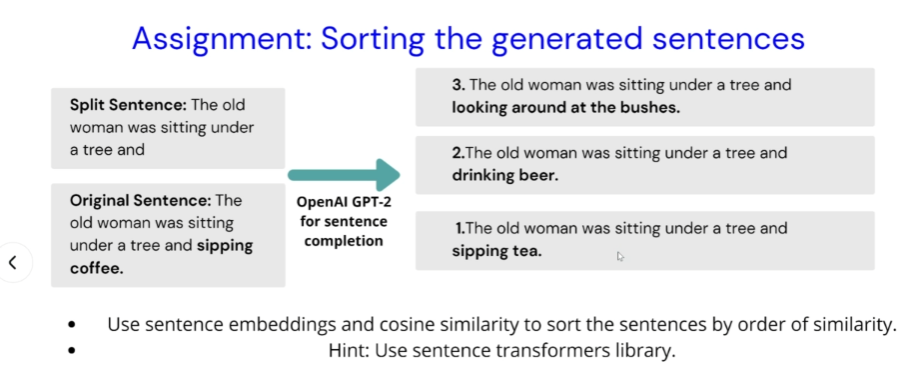

* most dissimilar staements can be used as a False statement

In [12]:
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 1.2 MB 30.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=c7e9d71c8cd5004917eb0614940815fe15839a3f00073b751a71ea03b41db2a6
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [13]:
# senetence transformers
from sentence_transformers import SentenceTransformer, util
# downloaded with distil bert tokens
BERT_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
possible_false_sentences.append('The old woman was sitting under a tree and sipping tea')
possible_false_sentences

['The old woman was sitting under a tree and looking around, her eyes wide.',
 'The old woman was sitting under a tree and she had been drinking.',
 'The old woman was sitting under a tree and the younger man standing beside her were holding their arms up.',
 'The old woman was sitting under a tree and the child lay on top of her.',
 'The old woman was sitting under a tree and her father in the house had just been born.',
 'The old woman was sitting under a tree and the man, who had seen nothing of them but their looks to see how they were going around.',
 'The old woman was sitting under a tree and the little girl sat over there, staring at me.',
 'The old woman was sitting under a tree and watched the two young women who came after her.',
 'The old woman was sitting under a tree and looked at the sky.',
 'The old woman was sitting under a tree and looking down at her garden.',
 'The old woman was sitting under the tree and drinking cocktail',
 'The old woman was sitting under a tree 

In [31]:
original_sentence = "The old woman was sitting under a tree and sipping coffee."

print(original_sentence)

The old woman was sitting under a tree and sipping coffee.


## convert all the possible and original sentences into vectors

In [32]:
false_sentences_embeddings = BERT_model.encode(possible_false_sentences)
original_sentence_embedding = BERT_model.encode([original_sentence])

## Compute cosine distance

In [33]:
import scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
distances = scipy.spatial.distance.cdist(original_sentence_embedding, false_sentences_embeddings, "cosine")[0]
print (distances)

[0.50252215 0.33225295 0.60066819 0.62460482 0.77680079 0.66284504
 0.35975995 0.52188714 0.38053888 0.38184608 0.2651789  0.19893001]


## Collect indexes and corresponding cosine values and sort the data on the basis of cosine values i.e. closeness to the original sentence

In [38]:
results = zip(range(len(distances)), distances)
results = sorted(results, key=lambda x: x[1])
print (results)

[(11, 0.19893001207962535), (10, 0.2651789029052116), (1, 0.3322529455514893), (6, 0.3597599485464962), (8, 0.3805388780166322), (9, 0.38184608397561537), (0, 0.5025221533323125), (7, 0.5218871400554701), (2, 0.6006681945774119), (3, 0.6246048232185613), (5, 0.6628450372201611), (4, 0.776800786418008)]


* 11th index has least similarity

* The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.

## append the sentences into a list based on the sorted indexes by keeping most similar sentences at the top

In [39]:
dissimilar_sentences =[]
for idx, distance in results:
  dissimilar_sentences.append(possible_false_sentences[idx])
  print (possible_false_sentences[idx])

The old woman was sitting under a tree and sipping tea
The old woman was sitting under the tree and drinking cocktail
The old woman was sitting under a tree and she had been drinking.
The old woman was sitting under a tree and the little girl sat over there, staring at me.
The old woman was sitting under a tree and looked at the sky.
The old woman was sitting under a tree and looking down at her garden.
The old woman was sitting under a tree and looking around, her eyes wide.
The old woman was sitting under a tree and watched the two young women who came after her.
The old woman was sitting under a tree and the younger man standing beside her were holding their arms up.
The old woman was sitting under a tree and the child lay on top of her.
The old woman was sitting under a tree and the man, who had seen nothing of them but their looks to see how they were going around.
The old woman was sitting under a tree and her father in the house had just been born.


## Keep the most dissimilar sentences at the top by reversing the list so that these sentences can be used as false statements

In [40]:
false_sentences_list_final = reversed(dissimilar_sentences)
for sent in false_sentences_list_final:
  print (sent)

The old woman was sitting under a tree and her father in the house had just been born.
The old woman was sitting under a tree and the man, who had seen nothing of them but their looks to see how they were going around.
The old woman was sitting under a tree and the child lay on top of her.
The old woman was sitting under a tree and the younger man standing beside her were holding their arms up.
The old woman was sitting under a tree and watched the two young women who came after her.
The old woman was sitting under a tree and looking around, her eyes wide.
The old woman was sitting under a tree and looking down at her garden.
The old woman was sitting under a tree and looked at the sky.
The old woman was sitting under a tree and the little girl sat over there, staring at me.
The old woman was sitting under a tree and she had been drinking.
The old woman was sitting under the tree and drinking cocktail
The old woman was sitting under a tree and sipping tea
